In [1]:
import sys
import glob
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Add parent directory to Python path to find local modules
sys.path.insert(0, '..')

In [3]:
from utils.utils import parse_nccl_log, parse_multiple_logs, performance_data_to_dataframe

In [4]:
from utils.plotting import plot_nccl_performance, plot_nccl_comparison_matrix

## Input files

In [5]:
log_files = glob.glob('../logs/jun4-2/slurm-Jun4-*.out')

In [6]:
log_files

['../logs/jun4-2/slurm-Jun4-1045987.out',
 '../logs/jun4-2/slurm-Jun4-1045985.out',
 '../logs/jun4-2/slurm-Jun4-1046018.out',
 '../logs/jun4-2/slurm-Jun4-1045998.out',
 '../logs/jun4-2/slurm-Jun4-1046021.out',
 '../logs/jun4-2/slurm-Jun4-1046019.out',
 '../logs/jun4-2/slurm-Jun4-1045988.out',
 '../logs/jun4-2/slurm-Jun4-1045986.out',
 '../logs/jun4-2/slurm-Jun4-1046000.out',
 '../logs/jun4-2/slurm-Jun4-1045999.out',
 '../logs/jun4-2/slurm-Jun4-1045997.out',
 '../logs/jun4-2/slurm-Jun4-1046022.out',
 '../logs/jun4-2/slurm-Jun4-1045990.out',
 '../logs/jun4-2/slurm-Jun4-1046028.out',
 '../logs/jun4-2/slurm-Jun4-1046015.out',
 '../logs/jun4-2/slurm-Jun4-1046027.out',
 '../logs/jun4-2/slurm-Jun4-1045984.out',
 '../logs/jun4-2/slurm-Jun4-1045995.out',
 '../logs/jun4-2/slurm-Jun4-1045996.out',
 '../logs/jun4-2/slurm-Jun4-1046011.out',
 '../logs/jun4-2/slurm-Jun4-1045994.out',
 '../logs/jun4-2/slurm-Jun4-1046026.out',
 '../logs/jun4-2/slurm-Jun4-1045991.out',
 '../logs/jun4-2/slurm-Jun4-104601

## Extract performance data

In [7]:
all_perf_data = [parse_nccl_log(log_file) for log_file in log_files]

In [8]:
perf_df = performance_data_to_dataframe(all_perf_data)

In [9]:
perf_df.head()

,jobid,nccl_version,nccl_algo,uses_alt_read,num_nodes,num_gpus,avg_bus_bandwidth,size_bytes,count_elements,type,redop,root,oop_time_us,oop_algbw_gbps,oop_busbw_gbps,oop_wrong,ip_time_us,ip_algbw_gbps,ip_busbw_gbps,ip_wrong
0,1045987,2.19.4,Ring,False,8,32,33.6012,32768,8192,float,sum,-1,157.0,0.21,0.40,0,133.6,0.25,0.48,0
1,1045987,2.19.4,Ring,False,8,32,33.6012,65536,16384,float,sum,-1,141.2,0.46,0.90,0,139.9,0.47,0.91,0
2,1045987,2.19.4,Ring,False,8,32,33.6012,131072,32768,float,sum,-1,151.9,0.86,1.67,0,182.6,0.72,1.39,0
3,1045987,2.19.4,Ring,False,8,32,33.6012,262144,65536,float,sum,-1,210.7,1.24,2.41,0,170.8,1.53,2.97,0
4,1045987,2.19.4,Ring,False,8,32,33.6012,524288,131072,float,sum,-1,659.5,0.79,1.54,0,616.5,0.85,1.65,0


## Visualizations

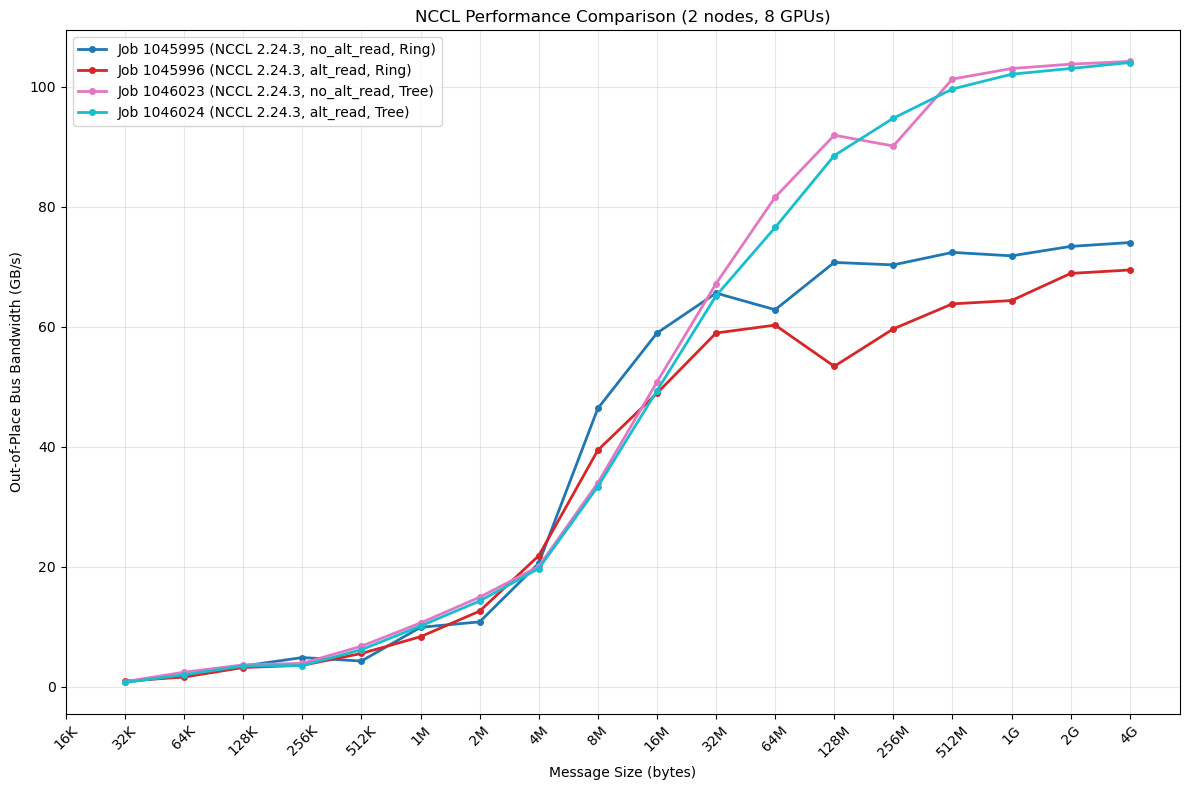

In [10]:
# Ring vs Tree algorithm for nccl 2.24
df = perf_df[perf_df.nccl_version == '2.24.3']
plot_nccl_performance(df, target_num_nodes=2);

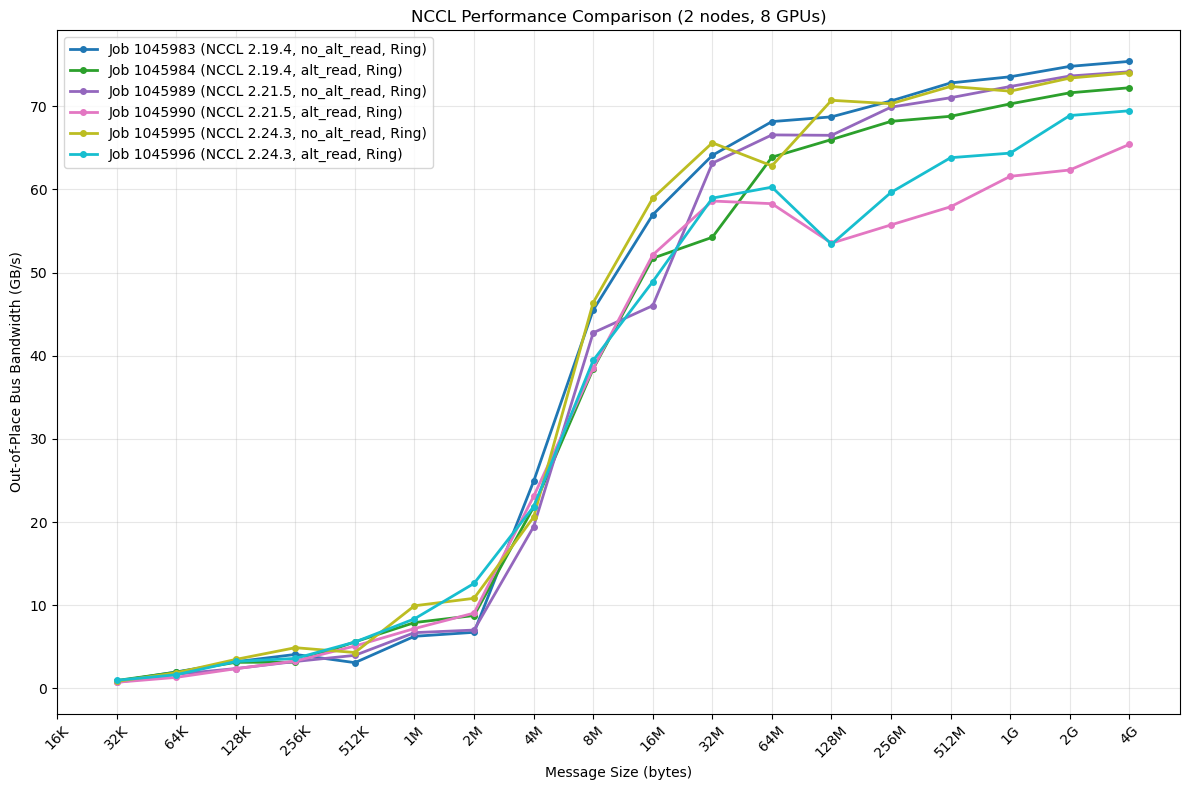

In [11]:
# Ring performance
perf_df_ring = perf_df[perf_df.nccl_algo == 'Ring']
plot_nccl_performance(perf_df_ring, target_num_nodes=2);

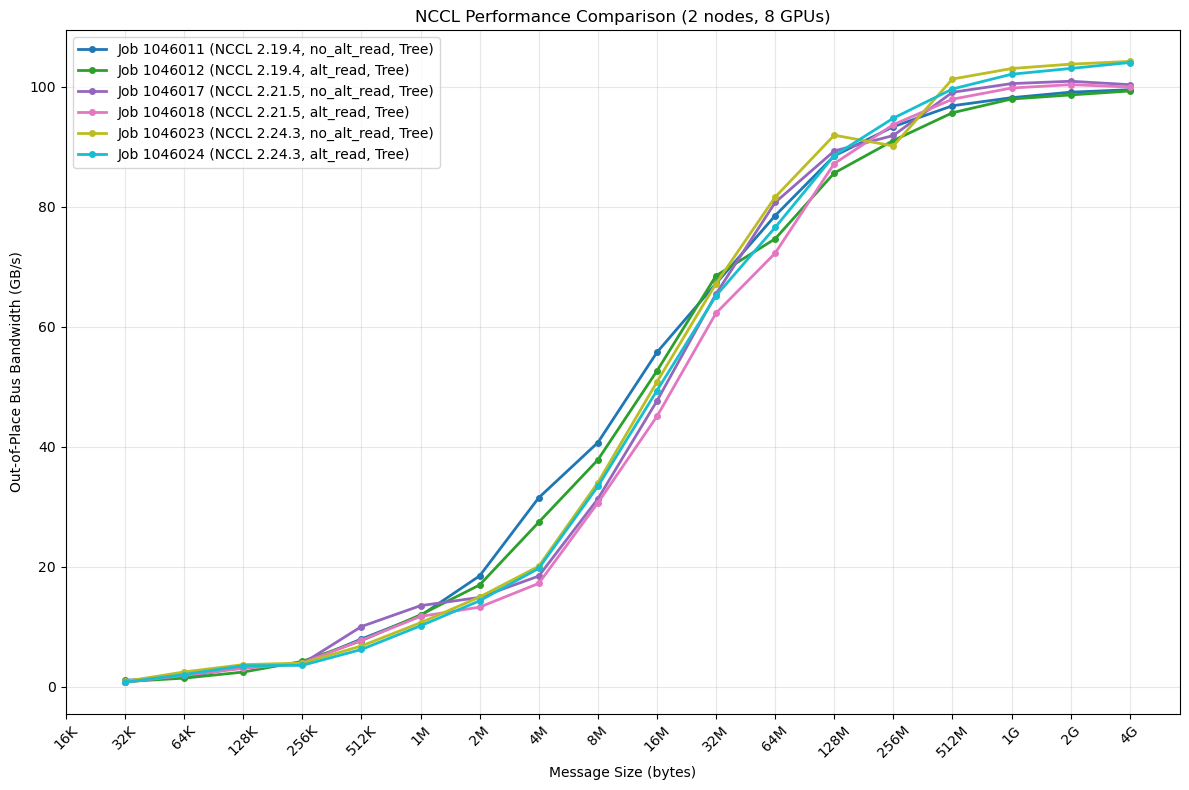

In [12]:
# Tree performance
perf_df_tree = perf_df[perf_df.nccl_algo == 'Tree']
plot_nccl_performance(perf_df_tree, target_num_nodes=2);

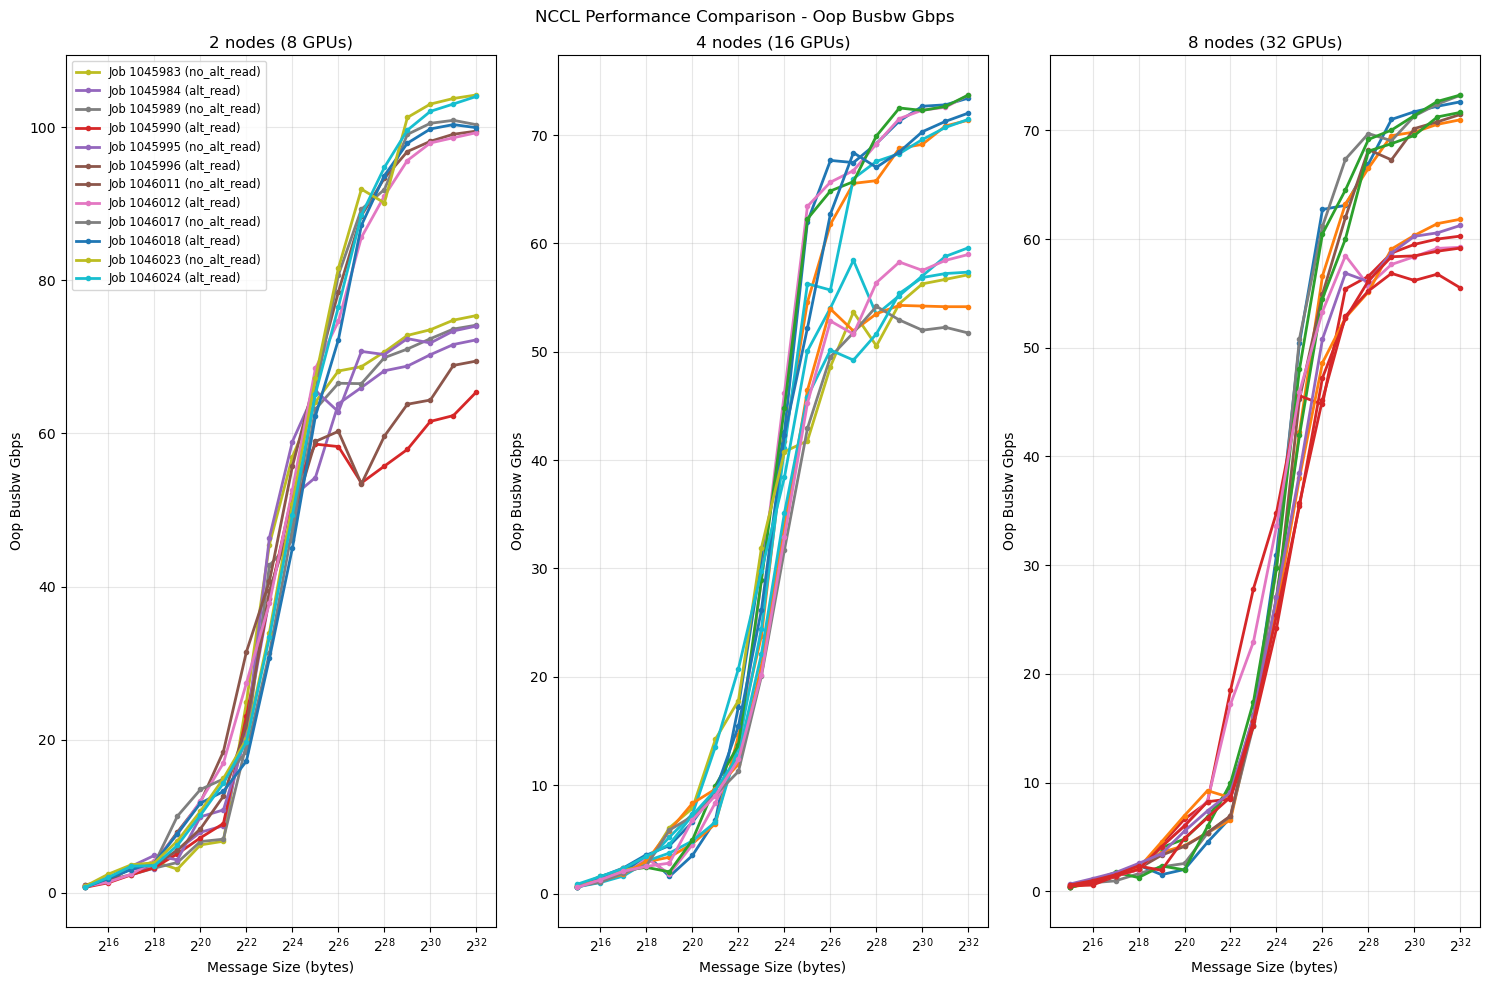

In [13]:
plot_nccl_comparison_matrix(perf_df);